In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv("DATA/attacks_clean.csv", index_col=0)
import re
import sys
sys.path.append('../')
import src.visualizations as vis
!conda install --yes --prefix {sys.prefix} plotly
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.1
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



### HIPÓTESIS 1: En 2018 hubo más ataques de tiburones tigre en el hemisferio sur que en 1990.

In [141]:
df_year_species = df[(df["Year"].isin(["1990","2018"])) & (df["Species"] == 'Tiger shark')]
df_year_species.head(2)

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,Hemisphere
4,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Diving,Gustavo Ramos,M,Unknown,Hand injury,Unknown,Unknown,Tiger shark,A .Kipper,Hemisferio norte
6,03-Jun-2018,2018,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,Fatal,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",Hemisferio sur


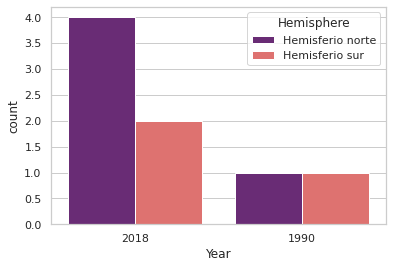

In [142]:
sns.countplot(x="Year", hue="Hemisphere", data=df_year_species,palette="magma");

Como se puede apreciar en el gráfico anterior, se verifica la Hipótesis 1 puesto que efectivamente hubo más ataques de tiburones Tigre en el Hemiferio Sur en el año 2018 (2) vs 1990 (1).

### HIPÓTESIS 2: En México hay más ataques de tiburones blancos que en USA.

Primero, voy a ver cuántos ataques de tiburones Blancos ha habido en los países donde se producen mayor número de ataques en el mundo y vemos que es USA el país que encabeza el ranking.

In [143]:
df_pais_specie=df[(df["Country"].isin(["MEXICO","USA","AUSTRALIA","SOUTH AFRICA","PAPUA NEW GUINEA","NEW ZEALAND"])) & (df["Species"] == 'White shark')]

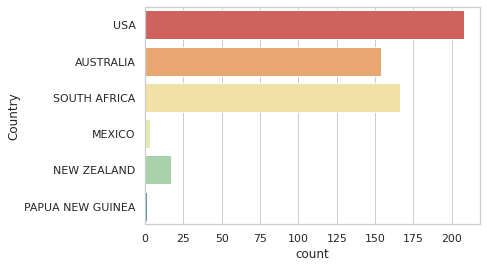

In [144]:
sns.countplot(y="Country", data=df_pais_specie,palette = "Spectral"); 

In [145]:
df_pais_white=df[(df["Country"].isin(["MEXICO","USA"])) & (df["Species"] == 'White shark')]
df_pais_white.head()

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,Hemisphere
0,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,No injury,Unknown,18h00,White shark,"R. Collier, GSAF",Hemisferio norte
60,24-Nov-2017,2017,Unprovoked,USA,California,"Stillwater Cove, Monterey County",Fishing,Grigor Azatian,M,25,Leg injury,Unknown,13h45,White shark,"R. Collier, GSAF",Hemisferio norte
100,23-Aug-2017,2017,Unprovoked,USA,Massachusetts,"Marconi Beach, Wellfleet, Barnstable County",Others,Cleveland Bigelow,M,69,Others,Unknown,10h00,White shark,"Cape Cod Times, 8/23/2017",Hemisferio norte
105,01-Aug-2017,2017,Boating,USA,California,"Between Pescadero Point & Bean Hollow Beach, S...",Fishing,Patrick Conroy,M,Unknown,No injury,Unknown,10h45,White shark,"R. Collier, GSAF",Hemisferio norte
116,20-Jul-2017,2017,Boating,USA,California,"Stearns Wharf, Santa Barbara",Others,Bret Jackson,M,40,No injury,Unknown,11h20,White shark,"R. Collier, GSAF",Hemisferio norte


Con el siguiente gráfico, la hipótesis 2 se refut pues claramente se puede apreciar que en USA se produce un mayor número de ataques de tiburones blancos que en México. 

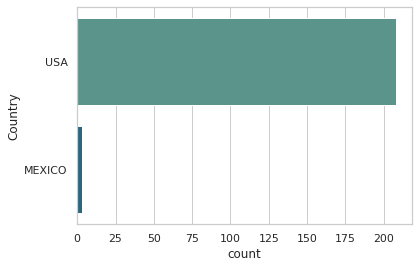

In [146]:
sns.countplot(y="Country", data=df_pais_white, palette="crest");

### HIPÓTESIS 3: La mayoría de las víctimas que que bucean son mujeres.

En primer lugar, vamos a ver la proporción de hombres y mujeres que practican las actividades más comunes.

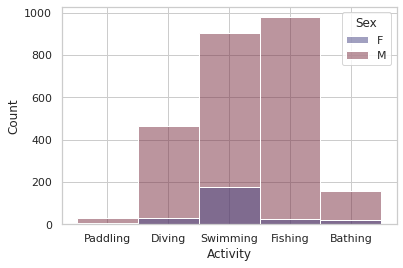

In [165]:
df_activity_sex=df[(df["Activity"].isin(["Fishing","Swimming","Diving","Bathing","Paddling"])) & (df["Sex"] != 'Unknown')]
sns.histplot(data=df_activity_sex, x="Activity", hue="Sex", palette="icefire");

Ahora puedo centrarme exclusivamente en la actividad "Diving" para ver la diferencia entre un género y otro:

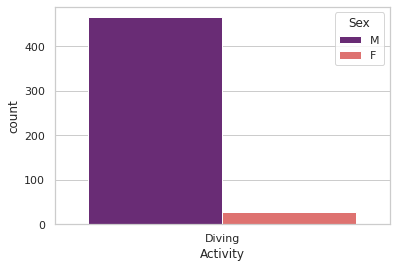

In [164]:
df_diving_sex=df[(df["Activity"]=="Diving") & (df["Sex"] != 'Unknown')]
sns.countplot(x="Activity", hue="Sex", data=df_diving_sex, palette="magma");

Como se puede apreciar en el gráfico anterior, se refuta la Hipótesis 3 pues la mayoría de las víctimas que practican buceo no son mujeres sino hombres.